In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import exp

In [2]:
file = "bk_one_fam.csv"
one_fam_3years = pd.read_csv(file)
one_fam_3years = one_fam_3years.drop(columns=['Unnamed: 0', 'Unnamed: 0.1' ])
one_fam_3years.head()


,building_class_category,sale_price,gross_sqft,year_of_sale,year_built,ZipCode,neighborhood,residential_units,SchoolDist,BldgClass,YearAlter1,YearAlter2,LotArea,ResArea,UnitsRes,NumFloors,SP/Sq_ft
0,01 ONE FAMILY HOMES,2950000.0,1692.0,2017,2014,11249.0,WILLIAMSBURG-SOUTH,1,14.0,A5,2013.0,0.0,1279.0,1692.0,1.0,3.0,1743.498818
1,01 ONE FAMILY HOMES,2930000.0,1476.0,2016,1920,11209.0,BAY RIDGE,1,20.0,A3,0.0,0.0,7000.0,1476.0,1.0,2.0,1985.094851
2,01 ONE FAMILY HOMES,2900000.0,1152.0,2016,1920,11211.0,WILLIAMSBURG-EAST,1,14.0,A5,2006.0,0.0,2500.0,1152.0,1.0,3.0,2517.361111
3,01 ONE FAMILY HOMES,2800187.0,2733.0,2017,2016,11231.0,RED HOOK,1,15.0,A5,0.0,0.0,1752.0,2733.0,1.0,3.0,1024.583608
4,01 ONE FAMILY HOMES,2755000.0,2500.0,2017,1901,11215.0,SUNSET PARK,1,15.0,A5,2015.0,0.0,2504.0,2500.0,1.0,3.0,1102.000000


In [14]:
one_fam_3years_brief = one_fam_3years[['neighborhood','year_of_sale','SchoolDist','SP/Sq_ft']]
one_fam_3years_brief.head()

,neighborhood,year_of_sale,SchoolDist,SP/Sq_ft
0,WILLIAMSBURG-SOUTH,2017,14.0,1743.498818
1,BAY RIDGE,2016,20.0,1985.094851
2,WILLIAMSBURG-EAST,2016,14.0,2517.361111
3,RED HOOK,2017,15.0,1024.583608
4,SUNSET PARK,2017,15.0,1102.000000


In [17]:
one_fam_1year = one_fam_3years_brief.loc[ (one_fam_3years_brief['year_of_sale'] == 2017 )]
one_fam_1year.head()

,neighborhood,year_of_sale,SchoolDist,SP/Sq_ft
0,WILLIAMSBURG-SOUTH,2017,14.0,1743.498818
3,RED HOOK,2017,15.0,1024.583608
4,SUNSET PARK,2017,15.0,1102.000000
7,OCEAN PARKWAY-SOUTH,2017,21.0,1701.732673
8,RED HOOK,2017,15.0,1038.095238


In [50]:
carroll_gardens = one_fam_1year.loc[one_fam_1year['neighborhood']=='CARROLL GARDENS']
carroll_gardens_mean = carroll_gardens['SP/Sq_ft'].mean()
carroll_gardens_mean

1076.0233918128656

In [51]:
park_slope = one_fam_1year.loc[one_fam_1year['neighborhood']=='PARK SLOPE']
park_slope_mean = park_slope['SP/Sq_ft'].mean()
park_slope_mean

893.2647259039765

In [52]:
south_slope = one_fam_1year.loc[one_fam_1year['neighborhood']=='SOUTH SLOPE']
south_slope_mean = south_slope['SP/Sq_ft'].mean()
south_slope_mean

nan

In [53]:
boerum_hill = one_fam_1year.loc[one_fam_1year['neighborhood']=='BOERUM HILL']
boerum_hill_mean = boerum_hill['SP/Sq_ft'].mean()
boerum_hill_mean

2120.7967836257308

In [54]:
borough_park = one_fam_1year.loc[one_fam_1year['neighborhood']=='BOROUGH PARK']
borough_park_mean = borough_park['SP/Sq_ft'].mean()
borough_park_mean

645.5573436882628

In [55]:
bath_beach = one_fam_1year.loc[one_fam_1year['neighborhood']=='BATH BEACH']
bath_beach_mean = bath_beach['SP/Sq_ft'].mean()
bath_beach_mean

695.5657130686182

In [66]:
bay_ridge = one_fam_1year.loc[one_fam_1year['neighborhood']=='BAY RIDGE']
bay_ridge_mean = bay_ridge['SP/Sq_ft'].mean()
bay_ridge_mean

673.9706950097217

In [57]:
clinton_hill = one_fam_1year.loc[one_fam_1year['neighborhood']=='CLINTON HILL']
clinton_hill_mean = clinton_hill['SP/Sq_ft'].mean()
clinton_hill_mean

1148.6486486486488

In [58]:
dyker_heights = one_fam_1year.loc[one_fam_1year['neighborhood']=='DYKER HEIGHTS']
dyker_heights_mean = dyker_heights['SP/Sq_ft'].mean()
dyker_heights_mean

627.3070577109243

In [71]:
bensonhurst = one_fam_1year.loc[one_fam_1year['neighborhood']=='BENSONHURST']
bensonhurst_mean = bensonhurst['SP/Sq_ft'].mean()
bensonhurst_mean

646.8887979114199

In [36]:
new_one_fam_1year = one_fam_1year.loc[(one_fam_1year['neighborhood']=='CARROLL GARDENS') |
                                     (one_fam_1year['neighborhood']=='PARK SLOPE')|
                                     (one_fam_1year['neighborhood']=='SOUTH SLOPE')|
                                     (one_fam_1year['neighborhood']=='BOERUM HILL')|
                                     (one_fam_1year['neighborhood']=='BOROUGH PARK')|
                                     (one_fam_1year['neighborhood']=='BATH BEACH')|
                                      (one_fam_1year['neighborhood']=='BAY RIDGE')|
                                      (one_fam_1year['neighborhood']=='CLINTON HILL')|
                                      (one_fam_1year['neighborhood']=='DYKER HEIGHTS')|
                                      (one_fam_1year['neighborhood']=='BENSONHURST')
                                     ]
new_one_fam_1year

,neighborhood,year_of_sale,SchoolDist,SP/Sq_ft
20,BOERUM HILL,2017,15.0,3026.315789
29,CLINTON HILL,2017,13.0,1148.648649
33,BOROUGH PARK,2017,20.0,1608.974359
44,PARK SLOPE,2017,15.0,1097.285068
46,CARROLL GARDENS,2017,15.0,1406.432749
...,...,...,...,...
5389,BOROUGH PARK,2017,15.0,290.798611
5524,BENSONHURST,2017,20.0,223.658926
5818,DYKER HEIGHTS,2017,20.0,145.408163
5868,BAY RIDGE,2017,20.0,79.485238


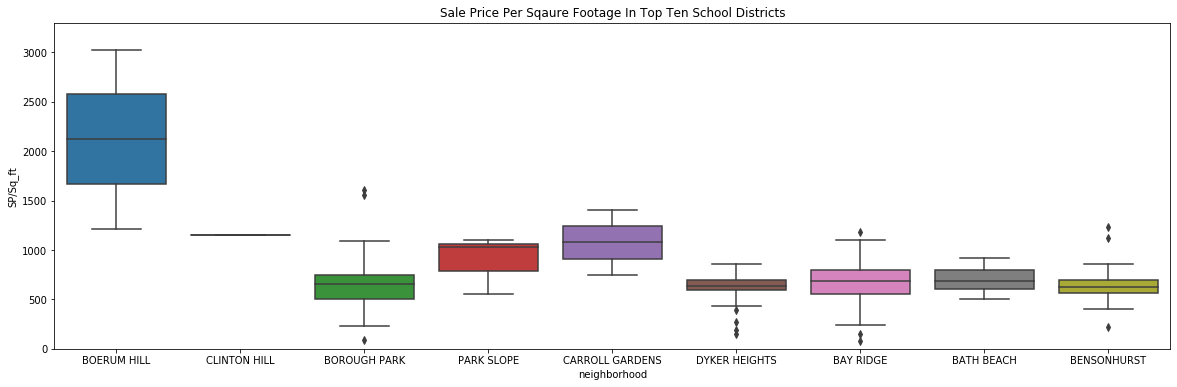

In [44]:
var = new_one_fam_1year["neighborhood"]
SP = new_one_fam_1year["SP/Sq_ft"]
data = pd.concat([SP, var], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y=SP, data=data)
fig.axis(ymin=0, ymax=3300);
plt.title('Sale Price Per Sqaure Footage In Top Ten School Districts')
plt.savefig("NeighborhoodnSchool.png")
plt.show()

In [76]:
x_axis = ['Carroll Gardens','Park Slope','South Slope','Boerum Hill','Borough Park','Bath Beach','Bay Ridge',
                      'Clinton Hill','Dyker Heights','Bensonhurst']


In [77]:
y_axis = [carroll_gardens_mean,
                                park_slope_mean,
                                south_slope_mean,
                               boerum_hill_mean,
                                borough_park_mean,
                               bath_beach_mean,
                               bay_ridge_mean,
                               clinton_hill_mean,
                               dyker_heights_mean,
                               bensonhurst_mean]


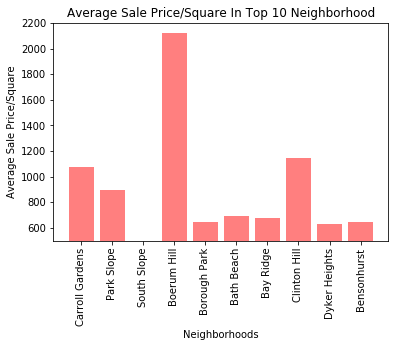

In [90]:
plt.bar(x_axis,y_axis,color = 'r', alpha = 0.5, align = 'center')
plt.xticks(rotation = 'vertical')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Sale Price/Square')
plt.title('Average Sale Price/Square In Top 10 Neighborhood')
plt.savefig("AvgSalePrice.png")
plt.ylim(500,2200)
plt.show()